# Exploratory Analysis
@author: Abdullahi Shuaibu Adamu

In [191]:
import pandas as pd
import seaborn as sns
import numpy as np

from matplotlib import pylab as plt

from sklearn.metrics import precision_score, recall_score, roc_curve
from sklearn.model_selection import cross_validate


# read in our training dataset
train_dataset = pd.read_csv('./data/train_2v.csv')

## Overview

The objective of this is to find clues and inspire the right questions that will hopefully inform our decisions during the modeling stage.

In [112]:
train_dataset.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [113]:
# view some of the descriptive values of our dataset
train_dataset.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,41938.000000,43400.000000
mean,36326.142350,42.217894,0.093571,0.047512,104.482750,28.605038,0.018041
std,21072.134879,22.519649,0.291235,0.212733,43.111751,7.770020,0.133103
min,1.000000,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,18038.500000,24.000000,0.000000,0.000000,77.540000,23.200000,0.000000
50%,36351.500000,44.000000,0.000000,0.000000,91.580000,27.700000,0.000000
75%,54514.250000,60.000000,0.000000,0.000000,112.070000,32.900000,0.000000
max,72943.000000,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


In [34]:
# lets have a look at the dimensionality of the dataset as well
train_dataset.shape

(43400, 12)

### Datapoints by Class

In [35]:
train_dataset['stroke'].value_counts()

0    42617
1      783
Name: stroke, dtype: int64

Overall we just have **783 cases** out of the whole dataset. This is both good news (i.e. not a lot of people with this condition) and bad news (i.e. makes it harder to model).

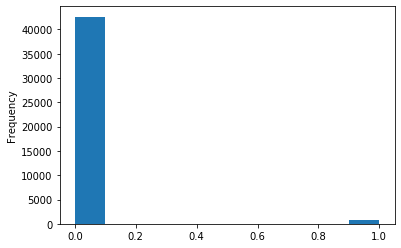

In [36]:
train_dataset['stroke'].plot.hist()

> - Overall, there seems to be a sizeable number of datapoints. However, there is a severe imbalance in the dataset for what we are trying to predict - as with most medical cases (and other relatively rare events). This narrows down the modeling approaches we will be using for this techinque.
> - It also seems to cover most age groups according to the descriptive stats on age.
>- **Modeling Action Point:** We will have to oversample the minority cases using oversampling techinques such as SMOTE and in addition to weighting the classes. to give our classifier a better chance, esepcially with borderline cases near the decision boundary which are hot spots for False Positive and False Negatives.

### Feature Scales

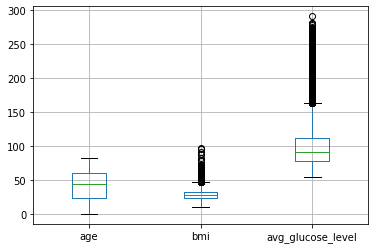

In [202]:
train_dataset[['age', 'bmi', 'avg_glucose_level']].boxplot()

>- **Modeling Action Point:** we will need to normalize these features due to their difference in scales. Some classifiers such as Neural Nets can be particularly sensitive to these.
>- We also see that there are outliers for BMI and glucose levels, which will be interesting to explore.

### Missing Data

In [221]:
train_dataset.isna().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

In [224]:
# number of cases we will loose after dropping missing values
train_dataset[train_dataset['stroke']==1].isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  140
smoking_status       145
stroke                 0
dtype: int64

>- There are various ways to handle missing data, dropping these datapoints is not going to be an option for this dataset. We already have so little (just 785 cases).
>- **Modeling Action Point** We will might need to interpolate missing points. Though this can contribute to noise from the errors in interpolation function. Specifically, classification errors or residual error from fitting and inferring missing data points will propate into our dataset as noise.

## Distributions and Relationships
Here we are interested in picking out any hint of relationship between the features of our dataset and stroke; as well as explore the distribution of these features.

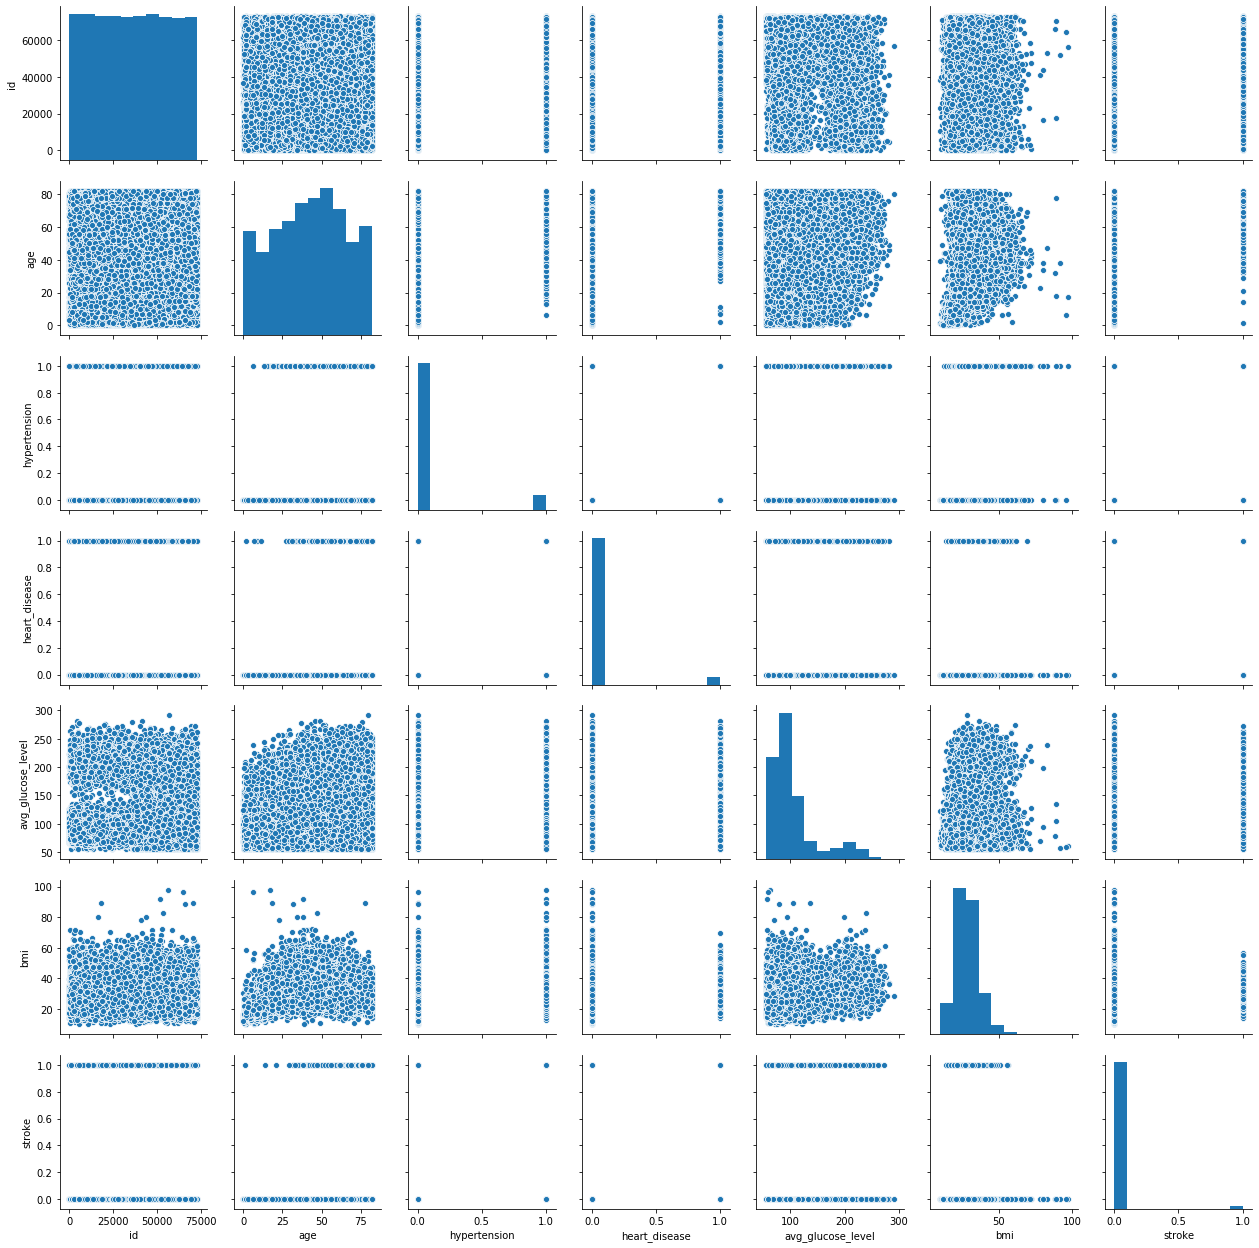

In [37]:
sns.pairplot(train_dataset)

> Some Obserations:
> - BMI seems to have a relation with stroke for a only a given range of values, which is interesting.
> - Another is BMI and age which visualy shows most strokes happening to people over 25. Although there are rare cases where pople under 25 suffer from this.

> **Summary**:
   > - Severly Imbalanced dataset
   > - Potentially strong relationships with stroke: BMI and Age

## Drill Down

Here we will be exploring the dimensions of the dataset. 

- Firstly, starting with some demographics to ensure that our dataset is not imbalanced along these dimensions (as this will affect the generalization ability of our model). 

- Secondly, we will be exploring some relationships.

In [166]:
# some helper functions

def boxplot(df:pd.DataFrame, features:list, title='', ylabel=None, yscale=None):
    """ boxplot of a list of variables from pandas dataframe"""
    df[features].boxplot(figsize=(10,10))
    plt.title(title)
    if ylabel:
        plt.ylabel(ylabel)
    if yscale:
        plt.yscale(yscale)
        
        
def histplot(df:pd.DataFrame, features:list, title='', ylabel=None, yscale=None):
    df[features].hist(figsize=(10,10))
    plt.title(title)
    if ylabel:
        plt.ylabel(ylabel)
    if yscale:
        plt.yscale(yscale)

## Demographics

In [167]:
# dataset grouped by stroke
grouped_by_stroke = train_dataset.groupby('stroke')

### Age

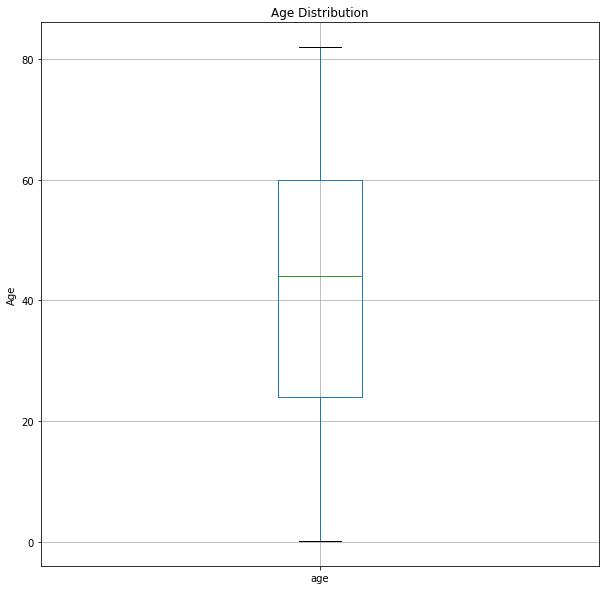

In [215]:
boxplot(train_dataset, features=['age'], title='Age Distribution', ylabel='Age')

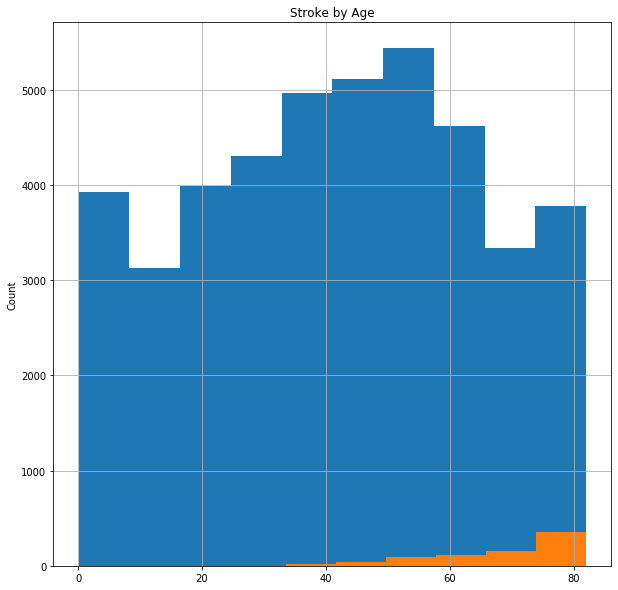

In [213]:
histplot(grouped_by_stroke,features='age', title='Stroke by Age', ylabel='Count')

> - Overall this further confirms there is a good coverage on age.
> - The plot also reveals relationship between age and stroke with most of the cases 
> - this does seem to be a base-rate effect as the distribution of the number of cases doesnt follow the expected cases if we consider the base rates.

### Gender

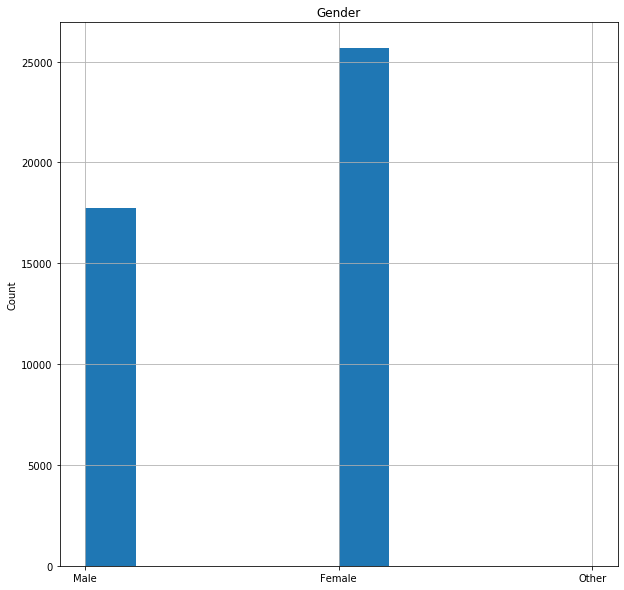

In [212]:
histplot(train_dataset, features='gender', title='Gender', ylabel='Count')

In [173]:
train_dataset['gender'].value_counts()

Female    25665
Male      17724
Other        11
Name: gender, dtype: int64

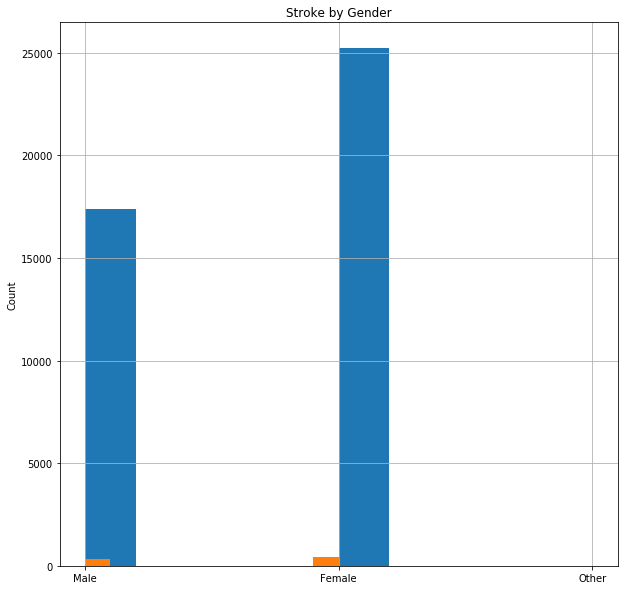

In [211]:
histplot(grouped_by_stroke, features='gender', title='Stroke by Gender', ylabel='Count')

> - Although there are relatively more females in the dataset, the dataset seems relatively balanced for Male and Female; but imabalanced for 'other'.
> - the number of cases also seems reasonably balanced between men and women. Hoever, there are no other.

## Work

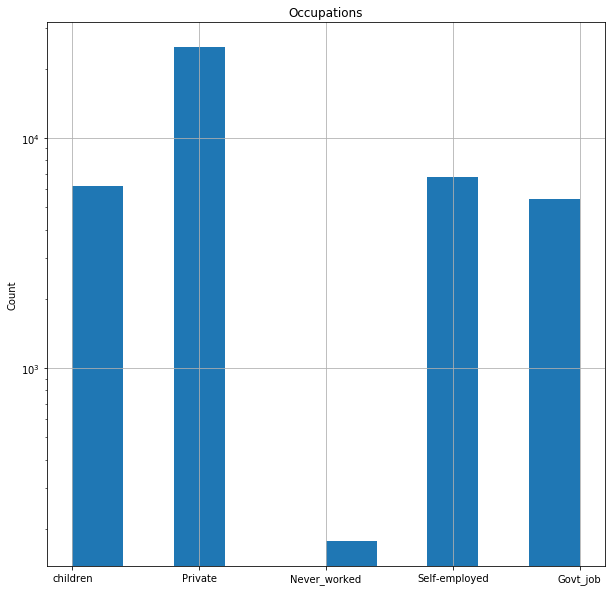

In [178]:
histplot(train_dataset,features='work_type', title='Occupations', ylabel='Count', yscale='log')

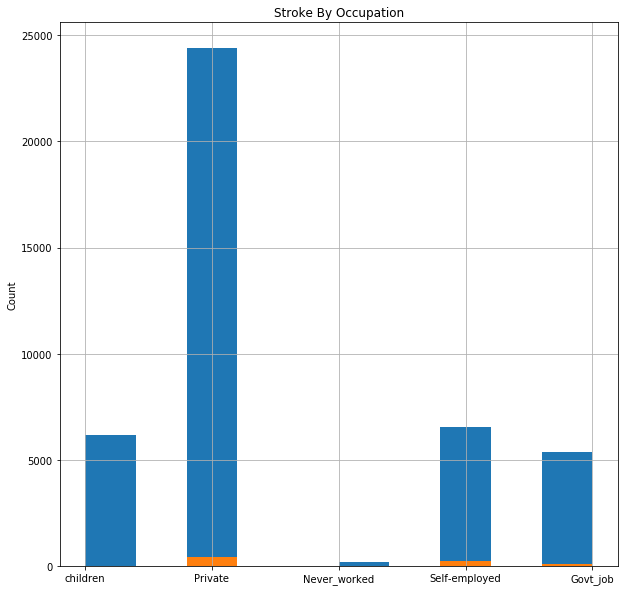

In [210]:
# grouped by stroke
histplot(grouped_by_stroke, features='work_type', title='Stroke By Occupation', ylabel='Count')

In [180]:
grouped_by_stroke['work_type'].value_counts()

stroke  work_type    
0       Private          24393
        Self-employed     6542
        children          6154
        Govt_job          5351
        Never_worked       177
1       Private            441
        Self-employed      251
        Govt_job            89
        children             2
Name: work_type, dtype: int64

>- One pattern here is the relatively high number of cases for people "private", and self-employed people. Interestingly, people who never worked dont seem to have any reported cases.  However, it is also important to keep in mind the effect of each categories base-rates. 

### Marriage History

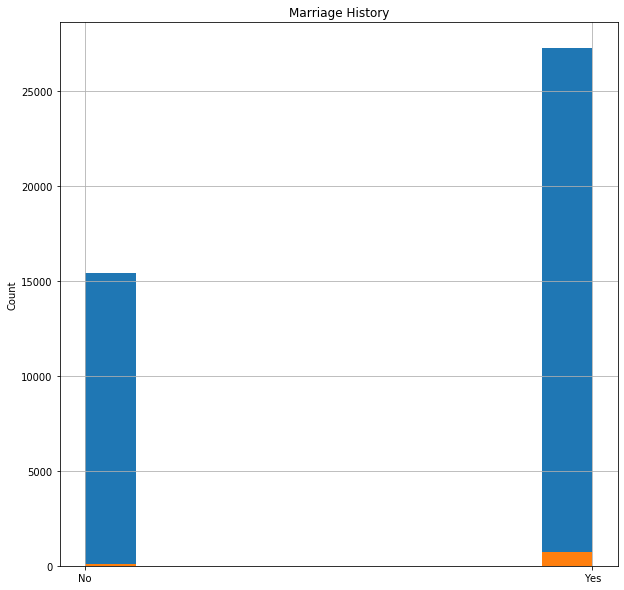

In [199]:
histplot(grouped_by_stroke,features='ever_married', title='Marriage History', ylabel='Count')

>- Likewise, the relatively higher number of cases for people who have married before is likely also being affected by base-rates.

## Health Metrics

### BMI

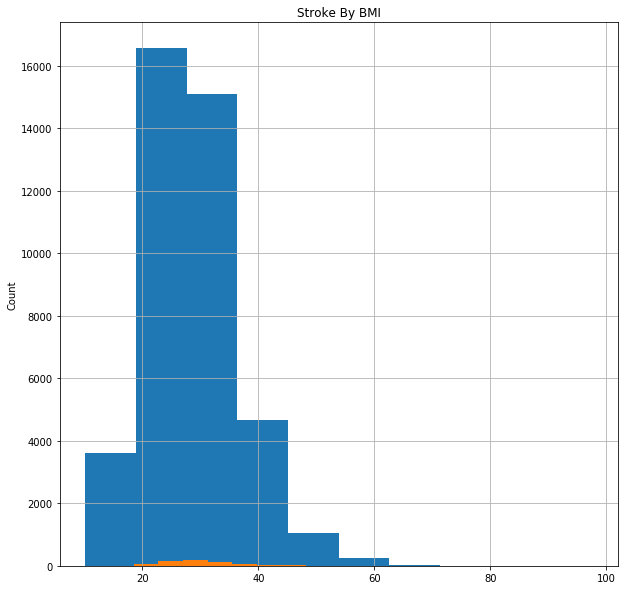

In [209]:
histplot(grouped_by_stroke, features='bmi', title='Stroke By BMI', ylabel='Count')

>- It seems like the cases are following the distribution of the BMI, which mean our earlier clue of a connection is likely due to the base-rates making stroke cases more likely.

### Avg. Glucose Level

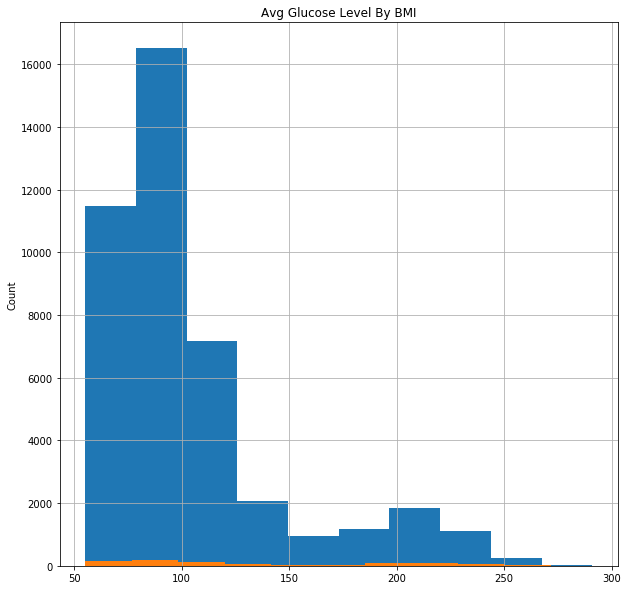

In [208]:
histplot(grouped_by_stroke, features='avg_glucose_level', title='Avg Glucose Level By BMI', ylabel='Count')

>- Stroke also seems to follow the distribution of avg. glucose level which also suggest there is some influence from the base-rates which make cases more likely.

# Medical Conditions

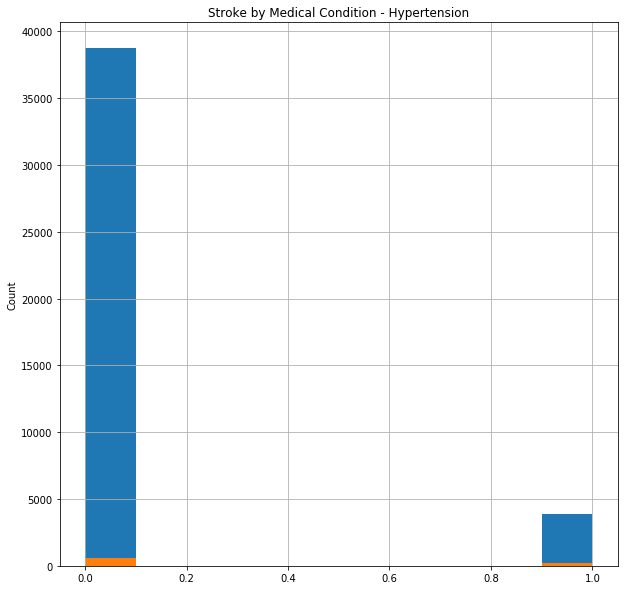

In [207]:
histplot(grouped_by_stroke, features='hypertension', title='Stroke by Medical Condition - Hypertension', ylabel='Count')

# Joint Distributions - Demographcis and Health Metrics

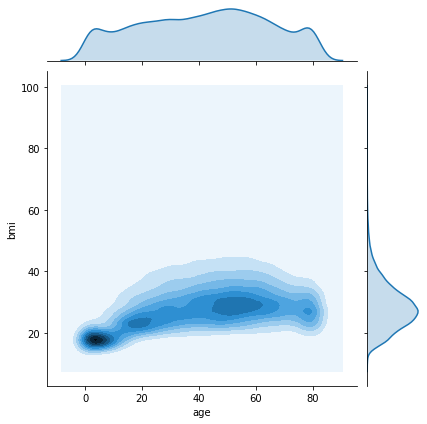

In [219]:
sns.jointplot(x="age", y="bmi", data=train_dataset, kind="kde");

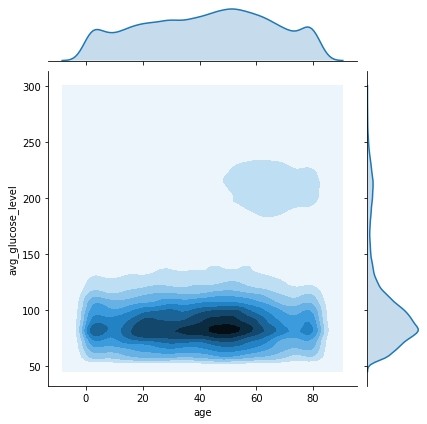

In [220]:
sns.jointplot(x="age", y="avg_glucose_level", data=train_dataset, kind="kde");

>- There seems to be people with age over the age of 50 with higher average glucose level readings. These could be diabetic patients as age is also one of the predictors for Diabetes[1]. Normally skin-fold-thickness is also used for diabetes prediction, so lets have a look at a measure that quantifies another facet of obescity: BMI.

### Outliers - Potentially Diabetic Over 45s

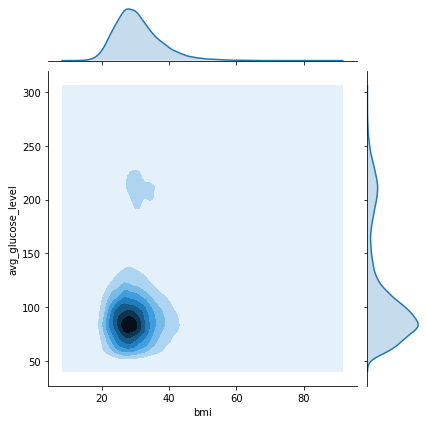

In [262]:
# Before that, lets narrow down to the age groups where the outliers appear, which is somewhere over 45.
outlier_age_threshold = 45
potentially_diabetic_over_45 = train_dataset[(train_dataset['age']>= outlier_age_threshold) ]

# Now we can plot the joint distribution
sns.jointplot(x="bmi", y="avg_glucose_level", data=potentially_diabetic_over_45, kind="kde");

Text(0.5, 1.0, 'Above Age Threshold')

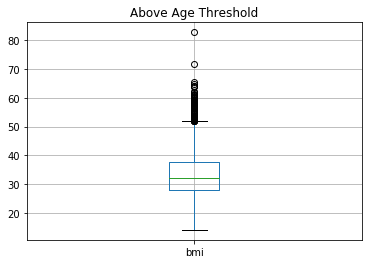

In [263]:
# lets narrow this down further and do a boxplot
avg_glucose_level_thres =150

potentially_diabetic_ove45_whigh_gl = potentially_diabetic[potentially_diabetic['avg_glucose_level']>=avg_glucose_level_thres]
potentially_diabetic_ove45_whigh_gl.boxplot('bmi')
plt.title('Above Age Threshold')

In [264]:
# lets look at the descriptive stats for these people
potentially_diabetic_ove45_whigh_gl.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4413.000000,4413.000000,4413.000000,4413.000000,4413.000000,4015.000000,4413.000000
mean,38275.222071,64.311353,0.260367,0.162928,205.777453,33.425056,0.058464
std,20879.537488,10.472866,0.438885,0.369342,25.092329,7.584012,0.234645
min,39.000000,45.000000,0.000000,0.000000,150.030000,14.200000,0.000000
25%,20576.000000,56.000000,0.000000,0.000000,189.340000,28.100000,0.000000
50%,39617.000000,64.000000,0.000000,0.000000,207.340000,32.300000,0.000000
75%,56050.000000,73.000000,1.000000,0.000000,222.940000,37.600000,0.000000
max,72917.000000,82.000000,1.000000,1.000000,291.050000,82.700000,1.000000


**Below 45 and Less than 150 AvgGlucoseLevel**

Text(0.5, 1.0, 'Below Age Threshold')

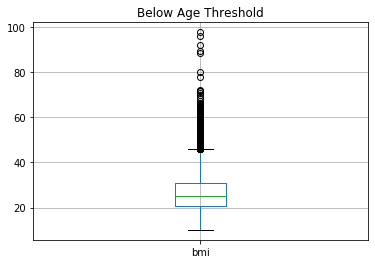

In [265]:
below_45_and_under150_gl = train_dataset[(train_dataset['age']<outlier_age_threshold) & (train_dataset['avg_glucose_level'] < avg_glucose_level_thres)]
below_45_and_under150_gl.boxplot('bmi')
plt.title('Below Age Threshold')

In [266]:
below_45_and_under150_gl.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,20992.000000,20992.000000,20992.000000,20992.000000,20992.000000,20655.000000,20992.000000
mean,35514.383289,23.311044,0.020151,0.002715,89.933149,26.487785,0.001477
std,20994.073410,13.026667,0.140518,0.052039,19.795011,7.918767,0.038401
min,4.000000,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,17382.750000,13.000000,0.000000,0.000000,75.510000,20.700000,0.000000
50%,34832.500000,24.000000,0.000000,0.000000,87.710000,25.200000,0.000000
75%,53556.250000,35.000000,0.000000,0.000000,102.150000,30.800000,0.000000
max,72940.000000,44.000000,1.000000,1.000000,149.950000,97.600000,1.000000


>- the relatively higher BMI further strengthens the likelihood that these are diabetiics.

### Link between Stroke and Potentially Diabetics?

In [282]:
# now we will have a look at the number of people
potentially_diabetic_ove45_whigh_gl[['bmi','age','avg_glucose_level','stroke']].groupby('stroke').describe()

bmi                                                        age  \
         count       mean       std   min   25%   50%   75%   max   count   
stroke                                                                      
0       3807.0  33.509719  7.626037  14.2  28.2  32.4  37.7  82.7  4155.0   
1        208.0  31.875481  6.595286  18.0  27.4  30.8  35.8  56.6   258.0   

                   ...             avg_glucose_level                         \
             mean  ...   75%   max             count        mean        std   
stroke             ...                                                        
0       64.010108  ...  73.0  82.0            4155.0  205.633745  25.188173   
1       69.162791  ...  78.0  82.0             258.0  208.091822  23.419463   

                                                  
           min     25%     50%       75%     max  
stroke                                            
0       150.03  189.09  207.28  222.9650  291.05  
1       151.16  192.75  209.44  222.3075  271.74  

[2 rows x 24 columns]

>- Slightly over 200 of the cases were diabetes, which is almost 30% of the total number of stroke cases in this dataset.  This shows a strong link between the two.
>- Interestingly, there are articles which have also discussed about this like such as [2].


# Summary 

>- Features with Potential:
    - Overall, Age seems to show the strongest relationship with stroke because it doesnt seem to be affected by base-rate of our dataset.
    - Joint distribution of Age and Avg Glucose level; Avg Glucose level and BMI both have potential as really strong predictors. We can explore polynomial features to be able to take advantage of these features particularly if considering we are considering  with linear models. For a neural network, a fully connected patient embedding layer will enable us to capture these feature relationships for use in ther hidden layers of the model.
>- Other Discoveries:
   - Potentially Diabetic People Over 45: Another discovery is potentially obese people over 45 and its link to stroke. Almose 30% of the cases were from potentially diabetic people. This relates to the joint distributions.
   
>- Modeling Action Points:
 - (1) Normalization might be needed for BMI, Age, and Avg. Glucose Level depending on the classifier. This is mainly because of their different scales.
 - (2) We will need to interpolate missing points for BMI and smoking, as we stand to loose atleast 140 samples if we drop missing datapoints.
 - (3) We can also explore polynomial features given that joint distributions from features has shown promise and also help us uncover a dimension of the dataset that is interesting and predictive; i.e. diabetes.
 - (3) Finally, we might need to oversmaple our minority class using techniques such as SMOTE, though maintaining base-rates.
 

# References 
Apologies if the referencing format is inconsisent or for work that I might have missed over this short EDA :)

[1]- Adamu, A., Maul, T., Bargiela, A., & Roadknight, C. (2015). Preliminary Experiments with Ensembles of Neurally Diverse Artificial Neural Networks for Pattern Recognition. In Recent Advances in Information and Communication Technology 2015 (pp. 85–96). Springer.

[2] - Chen, R., Ovbiagele, B., & Feng, W. (2016). Diabetes and Stroke: Epidemiology, Pathophysiology, Pharmaceuticals and Outcomes. The American journal of the medical sciences, 351(4), 380–386. doi:10.1016/j.amjms.2016.01.011